In [254]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.min_rows', 20)
pd.set_option('display.max_rows', 50)

pokemoni = pd.read_csv('csv_datoteke\pokemoni.csv', index_col='id')

# Analiza pokemonov

V tej datoteki bom analizirala lastnosti Pokemonov. Podatke sem zajela iz spletne strani __[Serebii](https://www.serebii.net/pokemon/nationalpokedex.shtml)__.

## Predstavitev pokemonov in njihovih lastnosti

Pokemoni so magična bitja, podobna živalim, ki izvirajo iz enako imenovane franšize iger. V igrah imajo pokemoni posebne lastnosti, ki določajo, kako se borijo drug z drugim in katere strategije so najbolj uporabne glede na pokemonove vrline. Te lastnosti so:
-  __Type__: Pokemon ima lahko enega ali dva tipa, ki določa, proti katerim napadom bo pokemon bolj ali manj vzdržljiv. Prav tako določa, katere napade se pokemon lahko nauči.

-  __Abilities__: V spopadu pokemon lahko uporabi eno od svojih zmožnosti, ki pasivno vplivajo nanjo. Na primer, pokemonova zmožnost je lahko lebdenje, zaradi česar je imun na vse napade tipa "ground" oziroma "zemlja".

-  __HP oziroma "Hit points"__: Pove, koliko škode lahko pokemon vzdrži, preden izgubi spopad.

-  __Attack__: Pove, kako močni so pokemonovi fizični (torej dotikalni) napadi.

-  __Special attack__: Pove, kako močni so pokemonovi magični napadi in napadi, ki delujejo na razdaljo.

-  __Defense__: Pove, kako dobro se pokemon brani proti fizičnim napadom, oziroma koliko HP izgubi.

-  __Special defense__: Pove, kako dobro se pokemon brani proti magičnim napadom.

-  __Speed__: Spopadi med pokemoni povečini delujejo izmenično - prvo napade en pokemon, potem drugi. Hitrost določa, kateri pokemon bo prvi na vrsti - pokemon z višjo hitrostjo začne prvi.

HP, (special) attack, (special) defense in speed so numerični, type in abilities pa kategorijski. 

In [255]:
pokemoni

,pokemon,HP,attack,defense,special attack,special defense,speed
id,,,,,,,
1,Bulbasaur,45,49,49,65,65,45
2,Ivysaur,60,62,63,80,80,60
3,Venusaur,80,82,83,100,100,80
4,Charmander,39,52,43,60,50,65
5,Charmeleon,58,64,58,80,65,80
6,Charizard,78,84,78,109,85,100
7,Squirtle,44,48,65,50,64,43
8,Wartortle,59,63,80,65,80,58
9,Blastoise,79,83,100,85,105,78


## Najboljši pokemoni

Seveda je prvo vprašanje, ki se nam porodi, kateri pokemoni so najmočnejši, torej kateri imajo najvišji seštevek numeričnih lastnosti. To najlažje naredimo z ustvarjanjem novega stolpca, ki naj predstavlja vsoto numeričnih lastnosti:

In [256]:
pokemoni['seštevek'] = pokemoni.sum(axis=1, numeric_only=True)
pokemoni.sort_values('seštevek', ascending=False)

,pokemon,HP,attack,defense,special attack,special defense,speed,seštevek
id,,,,,,,,
493,Arceus,120,120,120,120,120,120,720
890,Eternatus,140,85,95,145,95,130,690
150,Mewtwo,106,110,90,154,90,130,680
484,Palkia,90,120,100,150,120,100,680
384,Rayquaza,105,150,90,150,90,95,680
792,Lunala,137,113,89,137,107,97,680
791,Solgaleo,137,137,107,113,89,97,680
487,Giratina,150,100,120,100,120,90,680
716,Xerneas,126,131,95,131,98,99,680


Tudi naše naslednje vprašanje je očitno: Kje v DataFramu se nahaja pikachu, maskota Pokemon franšize?

In [257]:
pokemoni.sort_values('seštevek', ascending=False).reset_index(drop=True).loc[pokemoni.sort_values('seštevek', ascending=False).reset_index(drop=True)['pokemon'] == 'Pikachu']

,pokemon,HP,attack,defense,special attack,special defense,speed,seštevek
757,Pikachu,35,55,40,50,50,90,320


Žal je pikachu komaj 757. najmočnejši pokemon.

Vrnimo se nazaj k ostalim pokemonom. Kot vidimo, nam to ne pove veliko, saj obstaja veliko pokemonov, ki imajo seštevek večji ali enak od 570. Ti pokemoni so v igrah redkejši in njihova uporaba igro naredi bistveno lažjo, zato nas niso tako zanimivi. Oglejmo si tiste, ki imajo manjši seštevek.

In [258]:
pod_570 = pokemoni[pokemoni['seštevek'] < 570]
pod_570.sort_values('seštevek', ascending=False).head(10)

,pokemon,HP,attack,defense,special attack,special defense,speed,seštevek
id,,,,,,,,
567,Archeops,75,140,65,112,65,110,567
59,Arcanine,90,110,80,100,80,95,555
671,Florges,78,65,68,112,154,75,552
901,Ursaluna,130,140,105,45,80,50,550
637,Volcarona,85,60,65,135,105,100,550
892,Urshifu,100,130,100,63,60,97,550
1000,Gholdengo,87,60,95,133,91,84,550
983,Kingambit,100,135,120,60,85,50,550
468,Togekiss,85,50,95,120,115,80,545


Ker je tako bolj zanimivo in raznoliko, bom od zdaj naprej analizirala samo pokemone s seštevkom, manjšim od 570:

In [259]:
pokemoni.drop(pokemoni[pokemoni['seštevek'] >= 570].index, inplace=True)

Kot sem napisala v predstavitvi lastnosti, imajo pokemoni dve lastnosti, ki se imenujeta special attack in attack, ki povesta, kako močni so pokemonovi fizični oziroma magični napadi. Zato je pomembno le, da ima pokemon visoko število točk pri samo enem od njih - vsi njihovi napadi so lahko ali fizični ali magični.

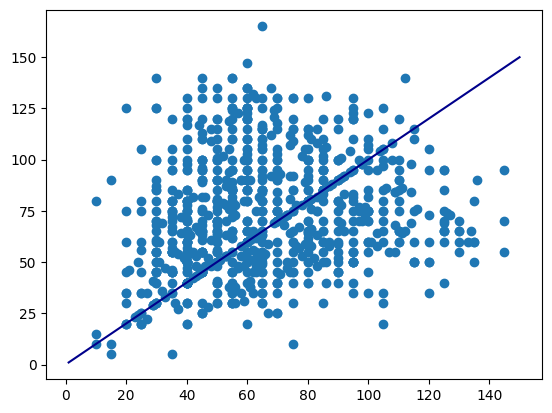

In [260]:
plt.scatter(pokemoni['special attack'], pokemoni['attack'])
x = [1 , 150]
y = x
plt.plot(x, y, color='#00008B')

Na zgornjem grafu je prikazano, da velika večina pokemonov nima enakega ali podobnega števila točk pri attack in special attack, tako da je analiza, opisana zgoraj, smiselna.
Definirala bom novi seštevek, ki bo seštel vse numerične lastnosti razen manjšega izmed attack in special attack.

In [261]:
pokemoni['novi attack'] = pokemoni[['attack','special attack']].max(axis=1)
pokemoni['novi seštevek'] = pokemoni['novi attack'] + pokemoni['defense'] + pokemoni['special defense'] + pokemoni['speed'] + pokemoni['HP']

novi = pokemoni[['pokemon', 'novi seštevek']].sort_values('novi seštevek', ascending=False).reset_index(drop=True)
stari = pokemoni[['pokemon', 'seštevek']].sort_values('seštevek', ascending=False).reset_index(drop=True)
pd.concat([novi, stari], axis = 1).head(10)

,pokemon,novi seštevek,pokemon,seštevek
0,Blissey,530,Archeops,567
1,Ursaluna,505,Arcanine,555
2,Togekiss,495,Florges,552
3,Shuckle,495,Ursaluna,550
4,Gholdengo,490,Volcarona,550
5,Kingambit,490,Urshifu,550
6,Volcarona,490,Gholdengo,550
7,Urshifu,487,Kingambit,550
8,Florges,487,Togekiss,545
9,Annihilape,485,Naganadel,540


Zgornji rezultati pokažejo, da so najmočnejši pokemoni glede na novi seštevek drugačni od najmočnejših glede na navadni seštevek. 
Naš nasldnji korak bo dodajanje tipov in zmožnosti k obstoječemu DataFramu.

In [268]:
types = pd.read_csv('csv_datoteke\\types.csv')
abilities = pd.read_csv('csv_datoteke\\abilities.csv')

pokemoni_z_tipi = pd.merge(pokemoni, types, right_on = 'pokemon', left_on = 'pokemon')
pokemoni_z_abilities = pd.merge(pokemoni, abilities, right_on = 'pokemon', left_on = 'pokemon')

Posvetimo se prvo zmožnostim. Oglejmo si, katere so najpogostejše.
Veliko pokemonov ima unikatne zmožnosti, zato bom te umaknila iz analize.

In [282]:
pokemoni_po_abilities = pokemoni_z_abilities.groupby('ability')

pogostost_abilities = pokemoni_po_abilities.size()
pogostost_abilities


ability
Adaptability       11
Aftermath           8
Analytic           12
Anger Point         9
Anger Shell         1
Anticipation       11
Arena Trap          3
Armor Tail          1
Aroma Veil          6
Ball Fetch          1
                   ..
Weak Armor         23
Well-Baked Body     1
White Smoke         4
Wimp Out            1
Wind Power          2
Wind Rider          2
Wonder Guard        1
Wonder Skin         5
Zen Mode            1
Zero to Hero        1
Length: 249, dtype: int64